In [10]:
import json
f = open('datasets.json')
 
# returns JSON object as
# a dictionary
datasets = json.load(f)

dict_keys(['dataset'])


In [1]:
import glob
lista = sorted(glob.glob('../images_mpii/*.jpg'))
for i in range(10):
    print(lista[i])

    
    

../images_mpii/000001163.jpg
../images_mpii/000003072.jpg
../images_mpii/000004812.jpg
../images_mpii/000005283.jpg
../images_mpii/000013469.jpg
../images_mpii/000015774.jpg
../images_mpii/000022704.jpg
../images_mpii/000024087.jpg
../images_mpii/000024100.jpg
../images_mpii/000024293.jpg


3.806403026480511
dict_keys(['x1', 'y1', 'x2', 'y2', 'keypoints', 'scale', 'objpos'])


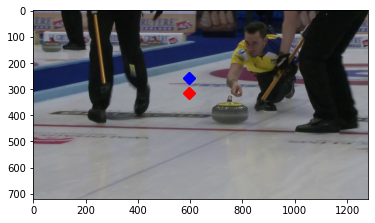

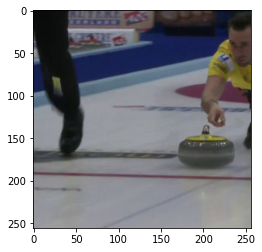

(720, 1280, 3)


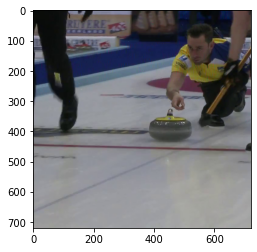

In [135]:

import matplotlib.pyplot as plt
import imageio
import numpy as np
import imgaug.augmenters as iaa


def sample_from_bounded_gaussian(x):
    return max(-2*x, min(2*x, np.random.randn()*x))

img1path = f"../images_mpii/{datasets['dataset']['MPII']['filepath'][0]}" 
a = datasets['dataset']['MPII']['people'][0]
print(a["info"][0]["scale"])
print(a["info"][0].keys())
x1 = a["info"][0]["x1"]
x2 = a["info"][0]["x2"]
y1 = a["info"][0]["y1"]
y2 = a["info"][0]["y2"]
c = a["info"]
s = a["info"][0]["scale"]
c2 = c.copy()
c2[1] = c2[1] + 15*s
s = s * 1.25
s = s * ( 2**(sample_from_bounded_gaussian(0.25)))
img = imageio.imread(img1path)
plt.imshow(img)
plt.scatter(c[0],c[1],marker="x",c="b",linewidths=10)
plt.scatter(c2[0],c2[1],marker="x",c="r",linewidths=10)
plt.show()
inp = crop(img,np.array(c2),np.array(s),0,256,128)
plt.imshow(inp)
plt.show()

def normalize_coordinates(row_i, col_j, img):
    num_rows, num_cols = img.shape[:2]
    x = col_j/(num_cols - 1.)
    y = row_i/(num_rows - 1.)
    return (x, y)
"""
aug = iaa.Sequential([
    iaa.CropToSquare(position=normalize_coordinates(c2[1],c2[0],img)),
    iaa.Affine(
        scale={"x": (0.4, 1.6), "y": (0.4, 1.6)},
    )
])
"""
aug = iaa.CropToSquare(position=normalize_coordinates(c2[1],c2[0],img))

print(img.shape)
img2 = aug(images=np.reshape(img,((1,)+img.shape)))
plt.imshow(np.squeeze(img2))
plt.show()

In [2]:
print(datasets["dataset"]["LSP"]["keypoints"][1]["points"])

[{'x': 28.120318970834436, 'y': 166.65510177108112, 'id': 1}, {'x': 49.17944312274209, 'y': 136.64584985461272, 'id': 2}, {'x': 62.604634769583235, 'y': 95.84379681029161, 'id': 3}, {'x': 80.2416512468059, 'y': 96.10703586219046, 'id': 4}, {'x': 91.56093047845627, 'y': 130.8545907128381, 'id': 5}, {'x': 78.39897788351396, 'y': 142.70034804828614, 'id': 6}, {'x': 61.288439510089006, 'y': 78.99649748876548, 'id': 7}, {'x': 49.96916027843864, 'y': 73.73171645078857, 'id': 8}, {'x': 63.92083002907746, 'y': 50.56667988369015, 'id': 9}, {'x': 98.66838487972508, 'y': 53.46230945457745, 'id': 10}, {'x': 111.3038593708697, 'y': 69.78313067230589, 'id': 11}, {'x': 109.46118600757778, 'y': 96.37027491408931, 'id': 12}, {'x': 81.03136840250245, 'y': 52.6725922988809, 'id': 13}, {'x': 83.40051986959206, 'y': 30.823750991276704, 'id': 14}]


{'normalizer': 125.877, 'isValidation': 0.0, 'joint_others': [[[895.0, 293.0, 1.0], [910.0, 279.0, 1.0], [945.0, 223.0, 0.0], [1012.0, 218.0, 1.0], [961.0, 315.0, 1.0], [960.0, 403.0, 1.0], [979.0, 221.0, 0.0], [906.0, 190.0, 0.0], [912.491, 190.659, 1.0], [830.509, 182.341, 1.0], [871.0, 304.0, 1.0], [883.0, 229.0, 1.0], [888.0, 174.0, 0.0], [924.0, 206.0, 1.0], [1013.0, 203.0, 1.0], [955.0, 263.0, 1.0]]], 'people_index': 1.0, 'scale_provided': 3.021, 'joint_self': [[620.0, 394.0, 1.0], [616.0, 269.0, 1.0], [573.0, 185.0, 1.0], [647.0, 188.0, 0.0], [661.0, 221.0, 1.0], [656.0, 231.0, 1.0], [610.0, 187.0, 0.0], [647.0, 176.0, 1.0], [637.02, 189.818, 1.0], [695.98, 108.182, 1.0], [606.0, 217.0, 1.0], [553.0, 161.0, 1.0], [601.0, 167.0, 1.0], [692.0, 185.0, 1.0], [693.0, 240.0, 1.0], [688.0, 313.0, 1.0]], 'objpos_other': [[952.0, 222.0]], 'img_width': 1280.0, 'dataset': 'MPII', 'img_height': 720.0, 'objpos': [594.0, 257.0], 'scale_provided_other': 2.472, 'annolist_index': 5.0, 'img_paths

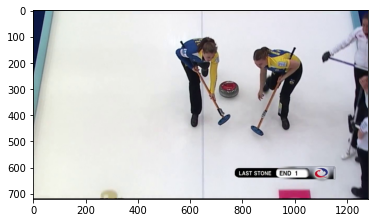

In [75]:
import matplotlib.pyplot as plt
import imageio
print(cacca[0])
print(cacca[1])
plt.imshow(imageio.imread("../images_mpii/015601864.jpg"))
plt.show()

In [ ]:
#np.savez_compressed(folder_imgs + '/patches_imgs', np.array(imgs))
#np.load(f"../sartorius/test/imgs/{cellClass}/patches_imgs.npz")['arr_0']

../images_lsp/im0001.jpg
(160, 70, 3)
(1, 14, 2)
(1, 14, 2)
(128, 128, 3)
[ 29.74645941 143.34544031]
[ 54.39352798 114.67635345]


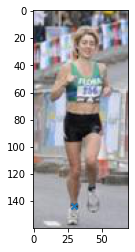

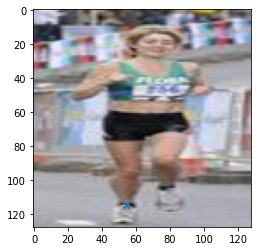

In [66]:
import imageio
import glob
import imgaug.augmenters as iaa
import numpy as np
from imgaug.augmentables import Keypoint, KeypointsOnImage
import matplotlib.pyplot as plt

"""seq = iaa.Sequential([
    iaa.Affine(
        scale=(0.75, 1.25)
    ) # rotate by exactly 10deg and scale to 50-70%, affects keypoints
    ,
    iaa.Affine(rotate=30),
    iaa.Affine(rotate=330),
    iaa.Fliplr(0.5)
])"""
seq = iaa.Sequential([
    iaa.Resize({"height": 128, "width": 128})
])

lspDataset = datasets["dataset"]["LSP"]
paths = sorted(glob.glob("../images_lsp/*.jpg"))
print(paths[0])
for i in range(1):
    img = imageio.imread(paths[i])
    print(img.shape)
    keypoints = []
    for j in range(14):
        p = lspDataset["keypoints"][i]["points"][j]
        coords = []
        coords.append(p["x"])
        coords.append(p["y"])
        coords = np.array(coords)
        keypoints.append(coords)
    keypoints = np.array(keypoints)
    keypoints = np.reshape(keypoints,(1,)+keypoints.shape)
    print(keypoints.shape)

    img2, kp2 = seq(image=img,keypoints=keypoints)
    print(kp2.shape)
    
    print(img2.shape)
print(keypoints[0][0])
print(kp2[0][0])
plt.imshow(img)
plt.scatter(keypoints[0][0][0],keypoints[0][0][1],marker="x",linewidths=2)
plt.show()
plt.imshow(img2)
plt.scatter(kp2[0][0][0],kp2[0][0][1],marker="x",linewidths=2)
plt.show()


In [25]:
#Creazione file npy LSP
import imageio
import glob
import imgaug.augmenters as iaa
import numpy as np
from imgaug.augmentables import Keypoint, KeypointsOnImage

lspDataset = datasets["dataset"]["LSP"]
paths = sorted(glob.glob("../images_lsp/*.jpg"))
for i in range(len(paths)):
    img = imageio.imread(paths[i])
    keypoints = []
    for i in range(14):
        p = lspDataset["keypoints"][i]["points"]
        coords = []
        coords.append(p["x"])
        coords.append(p["y"])
        keypoints.append(coords)
    seq = iaa.Sequential([
        iaa.Affine(
            scale=(0.75, 1.25)
        ) # rotate by exactly 10deg and scale to 50-70%, affects keypoints
        ,
        iaa.Sometimes(0.5,iaa.Affine(rotate=30),)
    ])
        
    
    

TypeError: list indices must be integers or slices, not str